# Задания

| Параметрическое оценивание             |       |
|----------------------------------------|-------|
| задание                                | баллы |
| т1 мм                                  |    10 |
| т2 ммп                                 |    15 |
| n3 эксперимент                         |     5 |
| т4 интервал мм                         |    10 |
| т5 интервал ммп                        |     5 |
| n6 эксперимент                         |     5 |
| n7 эксперимент                         |    15 |
| Всего                                  |    70 |


| Асимптотические Д.И. (шахты)           |       |
|----------------------------------------|-------|
| Задание                                | Баллы |
| Правило 3 сигм                         |     5 |
| Точечная оценка и асимптотический Д.И. |     7 |
| Число катастроф                        |     8 |
| Всего                                  |    20 |


| Д.И. для нормальных выборок (КР)       |       |
|----------------------------------------|-------|
| Задание                                | Баллы |
| Распределение результатов контрольной  |   2.5 |
| Д.И. для среднего                      |   2.5 |
| Хорошие и плохие студенты              |     5 |
| Д.И. для дисперсии                     |     7 |
| Доля написавших третью контрольную     |     6 |
| Снова разница средних                  |     6 |
| Всего                                  |    25 |

# Оформленние

- В некоторых практических заданях в этом ДЗ содержится код для самопроверки. Блоки с самопроверкой начинаются с оператора `assert` и лежат в отдельных блоках.
- Если у вас не получается решить задание, то закомментируйте этот блок с кодом.
- Перед отправкой ноутбука обязательно перезапустите ноутбук и запустите все ячейки с кодом, чтобы убедиться, что ваши результаты воспроизводимы.

---


- В этом ДЗ также нужно будет решить несколько теоретических заданий. Можно их написать от руки на листочке и отсканировать.

- Для красивых читаемых сканов можно воспользоваться нативным приложением "Заметки" на айфоне (инструкция [тут](https://uipservice.com/blog/how-to-scan-in-notes/)).

- На андройде есть неплохое приложение [CamScanner](https://play.google.com/store/apps/details?id=com.intsig.camscanner) и еще ряд [других](https://blackberries.ru/2017/06/12/luchshie-android-prilozheniya-dlya-skanirovaniya-dokumentov/).

- Если вы вдруг владеете LaTeX, то решение сверстанное им очень приветствуется.

- Все теоретические задания просьба склеить в один pdf-файл и прикрепить в классрум. Можно воспользоваться [этим](https://www.ilovepdf.com/) сервисом для объединения pdf-файлтов.

- На листочке просьба четко обозначить, что за задание решается.

---

- Итого в классрум нужно сдать 2 файла
    - pdf файл с решением теоретических заданий
    - ipynb ноутбук с кодом

- Просьба назвать файлы в формате: Иванова.pdf, Иванова.ipynb

- Архивировать файлы НЕ нужно

# Правило 3 сигм

В этом упражнении мы обсудим правила двух и трех сигм для произвольной случайной величины.

Пусть $X$ имеет некоторое распределение с математическим ожиданием $E[X] = a$ и конечной дисперсией $var(X) = \sigma^2 < \infty$. Для таких величин можно доказать неравенство Чебышёва: для всех $t>0$ верно
$$
\mathbb{P}\left( \vert X - \mathbb{E}[X]\vert > t\right) \leq \frac{Var[X]}{t^2}.
$$

С помощью неравенства Чебышёва покажите, с какой вероятностью эта случайная величина лежит в отрезках $[a − 2\sigma, a + 2\sigma]$ и $[a − 3\sigma, a + 3\sigma]$.

Сравните полученные вероятности с соответствующими вероятностями для стандартного нормального распределения $N (0, 1)$. Какой вывод можно сделать?

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

<font color=blue>

Требуется оценить вероятности $p_{2\sigma}=\mathbb{P}\left( \vert X - a\vert \leq 2\sigma\right)$ и $p_{3\sigma}=\mathbb{P}\left( \vert X - a\vert \leq 3\sigma\right)$.
    
По неравенству Чебышева
$$
\mathbb{P}\left( \vert X - a\vert > t\right) \leq \frac{\sigma^2}{t^2}\Rightarrow 1 - p_{2\sigma} \leq \frac{\sigma^2}{4\sigma^2}=\frac{1}{4}\Rightarrow  p_{2\sigma} \geq \frac{3}{4} = 0.75.
$$
Аналогично
$$
1 - p_{3\sigma} \leq \frac{\sigma^2}{9\sigma^2}=\frac{1}{9}\Rightarrow  p_{3\sigma} \geq \frac{8}{9} \approx 0.89
$$
    
Функция $\Phi(x)=\frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^x e^{-\frac{t^2}{2}}\,dt$ - это функция распределения случайной величины $X \sim N(0,1)$, у которой $a=0,\,\sigma^2=1$.

Поэтому 
$$p_{2\sigma}=\mathbb{P}\left(\vert X \vert \leq 2\right) = \Phi(2)-\Phi(-2)$$ 
и учитывая, что $\Phi(2)+\Phi(-2)=1$ (вытекает из симметрии функции плотности относительно оси $Oy$), получаем $$p_{2\sigma}=2\cdot\Phi(2)-1$$

Аналогично
$$p_{3\sigma}=2\cdot\Phi(3)-1$$

Найдем эти вероятности с помощью функций библиотеки `scipy`:

</font>

In [2]:
print(f'p_2s = {2*stats.norm().cdf(2)-1}')
print(f'p_3s = {2*stats.norm().cdf(3)-1}')

p_2s = 0.9544997361036416
p_3s = 0.9973002039367398


<font color=blue>

Таким  образом:
$$p_{2\sigma}\approx 0.954$$
$$p_{3\sigma}\approx 0.997$$    

Хорошо видно, что для стандартной нормальной случайной величины вероятности попасть в интервалы $2\sigma$ и $3\sigma$ заметно больше, чем те что вытекают из неравенства Чебышева для произвольной случайной величины, что говорит о высокой плотности $N(0,1)$ около своего среднего значения и малой плотности на хвостах (за пределами интервалов).

</font>

# Равномерная случайная величина

## Оценивание параметров и проверка свойств

Рассмотрим случайную величину из равномерного распределения на отрезке от $0$ до $θ$ с функцией распределения:

$$
F(x) = \begin{cases} 0, & x < 0 \\ x/\theta, & 0 \le x \le \theta \\ 1, & x > \theta. \end{cases}
$$

и с плотностью распределения:

$$
f_X(x) = \begin{cases} 1/\theta, & 0 \le x \le \theta \\ 0, & \text{otherwise.} \end{cases}
$$

или через индикаторную функцию:

$$
f_X(x) = \frac{1}{\theta} \cdot \mathbb 1\{0 \le x \le \theta\}.
$$



### т1 мм
Покажите, что оценка параметра $θ$ метом моментов есть оценка $\hat{\theta}_\text{MM} = 2\bar{X}$

Покажите, являются ли оценка $\hat{\theta}_\text{MM}$
- несмещенной $ E[\hat{\theta}]=\theta $

- состоятельной $ \hat{\theta} \overset{\mathbb{P}}{\to} \theta , n\to ∞$
    - нужно найти $\text{Var}(\hat{\theta})$ через свойства дисперсии и воспользоваться неравенством Чебышева
    - Для подсчёта дисперсии $Var(\overline{X})$ нужно воспользоваться свойствами дисперсии (линейностью и выносом константы)



<font color=blue>

Заметим, что 
$$ E[X]=\int\limits_{-\infty}^{+\infty} x\cdot f_X(x)\,dx = \int\limits_{0}^{\theta} \frac{x}{\theta}\,dx = \frac{1}{\theta}\left(\frac{x^2}{2}\right)\bigg|_{0}^{\theta}=\frac{\theta}{2} \Rightarrow \theta = 2E[X]$$

Поэтому, оценка методом моментов будет
$$ \hat{\theta}_\text{MM} = 2\bar{X} $$

Покажем, что эта оценка несмещенная. Воспользуемся тем, что мы имеем дело со случайной выборкой из заданного распределения, т.е. $\forall i = 1\dots n:\, E[X_i]=\frac{\theta}{2}$, где $n$ размер выборки. Поэтому:
$$E[\hat{\theta}_\text{MM}]=E(2\cdot\bar{X})=2\cdot E\left[\frac{\sum_{i=1}^{n}X_i}{n}\right]=\frac{2}{n}\sum_{i=1}^{n}E[X_i]=\frac{2}{n}\cdot\frac{\theta}{2}\cdot n=\theta$$
    
Теперь, покажем, что она состоятельна, т.е. $ \hat{\theta}_\text{MM} \overset{\mathbb{P}}{\to} \theta , n\to ∞$ или что тоже самое $\forall \varepsilon>0\, \lim\limits_{n\to\infty} \mathbb{P}(\vert \hat{\theta}_\text{MM}(n) - \theta\vert > \varepsilon) = 0$.

Согласно неравенству Чебышева имеем:
$$ \forall \varepsilon > 0\,\, \mathbb{P}(\vert \hat{\theta}_\text{MM}(n)-E[\hat{\theta}_\text{MM}(n)]\vert > \varepsilon) \leq \frac{D[\hat{\theta}_\text{MM}(n)]}{\varepsilon^2} $$

Как было установлено выше $E[\hat{\theta}_\text{MM}(n)] = \theta$. Найдем дисперсию $D[\hat{\theta}_\text{MM}(n)]$.
    
Т.к. выборка случайная из заданного распределения, то величины $X_i$ независимы и имеют такое же мат. ожидание и дисперсию как и величина $X$. Как уже вычислили ранее мат. ожидание $E[X]=\frac{\theta}{2}$, поэтому дисперсия будет:
$$ D[X] = EX^2 - (EX)^2 = EX^2 - \frac{\theta^2}{4}=\int\limits_{0}^{\theta}\frac{x^2}{\theta}\,dx-\frac{\theta^2}{4}=\frac{1}{\theta}\cdot\frac{x^3}{3}\bigg|_0^{\theta}-\frac{\theta^2}{4}=\frac{\theta^2}{3} - \frac{\theta^2}{4}=\frac{\theta^2}{12}$$
    
Таким образом $\forall i=1\dots n\,\,D[X_i]=\frac{\theta^2}{12}$, поэтому (учитывая независимость $X_i$ в совокупности) получаем:
$$D[\hat{\theta}_\text{MM}(n)] = D[2\bar{X}]=4\cdot D\left[\frac{\sum_{i=1}^{n} X_i}{n}\right]=\frac{4}{n^2}\sum_{i=1}^{n}D[X_i]=\frac{4}{n^2}\cdot\frac{\theta^2}{12}\cdot n=\frac{\theta^2}{3n}$$

Теперь неравенство Чебышева можно переписать так:
$$ \forall \varepsilon > 0\,\, \mathbb{P}(\vert \hat{\theta}_\text{MM}(n)-\theta\vert > \varepsilon) \leq \frac{\theta^2}{3n\varepsilon^2} $$
При любом фиксированном $\varepsilon > 0$ правая часть неравенства $\frac{\theta^2}{3n\varepsilon^2}\to 0$ при $n\to\infty$. Поэтому $\forall \varepsilon>0\, \lim\limits_{n\to\infty} \mathbb{P}(\vert \hat{\theta}_\text{MM}(n) - \theta\vert > \varepsilon) = 0$ и значит $ \hat{\theta}_\text{MM} \overset{\mathbb{P}}{\to} \theta , n\to ∞$, что и требовалось.

</font>

### т2 ммп (бонусное)

Оценка параметра $θ$ метом максимального правдоподобия есть оценка $\hat{\theta}_\text{ML} = \max(X_1, ..., X_n)$

Покажите, являются ли оценка $\hat{\theta}_\text{ML}$
- несмещенной $ E[\hat{\theta}]=\theta $
    
    - Эта оценка особая и имеет свое распределение. Для анализа свойств используйте тот факт, что распределение максимума из $n$ независимых равномерно распределённых на отрезке $[0, θ]$ случайных величин имеет функцию распределения $\text{cdf}$:

    $$
    \mathbb{P}\left(\max \left(X_{1}, \ldots, X_{n}\right)<x\right)=[\mathbb{P}(X_i<x)]^{n}=\left(\frac{x}{\theta}\right)^{n}=F(x)=\text{cdf}(\hat{\theta}_\text{MM})
    $$

    - Ваша задача
        - найти плотность распределения $\text{pdf}$ (как производную от функции распределения $\text{cdf}$)
        - а затем посчитать интеграл вида $E[X] = \int x \cdot \text{pdf}(x) \ dx$

- Совпадает ли мат. ожидание оценки параметра с истинным значением? Чему равна величина смещения? Как его можно скорректировать?

---
Покажите, являются ли оценка $\hat{\theta}_\text{ML}$
- асимптотически несмещенной $ E[\hat{\theta}]=\theta, n\to ∞$
    - Для этого воспользуйтесь свойствами пределов
- состоятельной $ \hat{\theta} \overset{\mathbb{P}}{\to} \theta , n\to ∞$
    - Тут нужно посчитать еще один интеграл в вида $E[X^2] = \int x^2 \cdot \text{pdf}(x) \ dx$
    - Затем найти дисперсию, как $\text{var}(X) = E[X^2] - \left(E[X]\right)^2$
    - Затем снова воспользоваться неравенством Чебышева


---
Какая из двух оценок быстрее сходится по вероятности с истинному значению? У какой оценки быстрее убывает дисперсия с ростом выборки?


<font color=blue>

Пусть 
$$ Y\equiv\hat{\theta}_\text{ML}(n) = \max(X_1, ..., X_n) $$
    
Чтобы найти $E[Y]$ найдем функцию распределения:
$$ F_Y(x)=\mathbb{P}(Y \leq x)=\mathbb{P}(X_1\leq x, ...,X_n\leq x)=(\text{т.к. $X_i$ независимы})=\mathbb{P}(X_1 \leq x)\cdot ... \cdot\mathbb{P}(X_n \leq x) = \begin{cases} 0, & x < 0 \\ \left(\frac{x}{\theta}\right)^n, & 0 \le x \le \theta \\ 1, & x > \theta. \end{cases} $$

Отсюда получаем функцию плотности $Y$:
$$ f_Y(x) = \frac{n\cdot x^{n-1}}{\theta^n}\cdot\mathbb{1}\{0 \le x \le \theta\} $$
    
Таким образом:
$$ E[Y] = \int\limits_0^\theta x\cdot f_Y(x)\,dx = \frac{n}{\theta^n}\int\limits_0^\theta x^n\,dx=\frac{n}{\theta^n}\cdot\frac{x^{n+1}}{n+1}\bigg|_0^\theta = \frac{n}{n+1}\cdot\theta$$

Т.е. мат. ожидание оценки $\hat{\theta}_\text{ML}$ не совпадает с истинным значением параметра $\theta$. Величина смещения будет
$$ bias = E[\hat{\theta}_\text{ML}]-\theta = \frac{n}{n+1}\cdot\theta-\theta=-\frac{\theta}{n+1} $$
    
Чтобы получить несмещенную оценку можно рассмотреть оценку $\hat{\theta}_0 = \left(\frac{n+1}{n}\right)\cdot\hat{\theta}_\text{ML}$. Действительно:
$$E[\hat{\theta}_0] = E\left[\left(\frac{n+1}{n}\right)\cdot\hat{\theta}_\text{ML}\right] = \frac{n+1}{n}\cdot\frac{n}{n+1}\cdot\theta = \theta $$
Т.е. оценка $\hat{\theta}_0 = \frac{n+1}{n}\max(X_1, ..., X_n)$ является несмещенной.
    
Оценка $\hat{\theta}_\text{ML}(n)$  являет ассимптотически несмещенной, т.к. найденная выше величина смещения этой оценки $bias = -\frac{\theta}{n+1} \to 0$ при $n\to\infty$.

Теперь исследуем оценку $\hat{\theta}_\text{ML}\equiv Y$ на состоятельность. 
    
Найдем $D[Y]$:
$$ D[Y] = E[Y^2] - (E[Y])^2 = \int\limits_0^\theta x^2\cdot\frac{nx^{n-1}}{\theta^n}\,dx - \frac{n^2}{(n+1)^2}\theta^2=\frac{n}{n+2}\theta^2 - \frac{n^2}{(n+1)^2}\theta^2=\frac{n}{(n+1)^2\cdot(n+2)}\theta^2 $$

Т.к. $\frac{n}{(n+1)^2\cdot(n+2)}=\frac{1}{(n+1)^2\cdot\left(1+\frac{2}{n}\right)}\sim\frac{1}{(n+1)^2}$, при $n\to\infty$, то $D[Y]\sim \frac{\theta^2}{(n+1)^2}\to 0$ при $n\to\infty$, т.е. по неравенству Чебышева имеем:
$$ \mathbb{P}\left(\left\vert\hat{\theta}_\text{ML}-\frac{n}{n+1}\cdot\theta\right\vert > \varepsilon\right) \leq \frac{D[Y]}{\varepsilon^2}\to0,\,n\to\infty$$

Однако нам нужно чтобы вероятность $\mathbb{P}(\vert\hat{\theta}_\text{ML}-\theta\vert > \varepsilon)\to0,\,n\to\infty$. Покажем, что это тоже выполняется.

Зафиксируем $\varepsilon > 0$ и оценим вероятность того, что $\vert\hat{\theta}_\text{ML}-\theta\vert > \varepsilon$.

Т.к. $\theta > 0$ и $\frac{\theta}{n+1}\to0,\,n\to\infty$, то $\exists N_\varepsilon\in\mathbb{N}\,\forall n > N_\varepsilon: 0 < \frac{\theta}{n+1} < \frac{\varepsilon}{2}$. Поэтому для всех $n > N_\varepsilon$ получаем, что:
$$ \vert\hat{\theta}_\text{ML}-\theta\vert > \varepsilon $$
$$ \Updownarrow $$
$$ \text{либо }\hat{\theta}_\text{ML}-\theta <  -\varepsilon,\text{ либо }\hat{\theta}_\text{ML}-\theta > \varepsilon $$   
$$ \Downarrow $$
$$\text{либо }\hat{\theta}_\text{ML} - \theta + \frac{\theta}{n+1} < -\varepsilon + \frac{\theta}{n+1} < -\frac{\varepsilon}{2}, \text{ либо }\hat{\theta}_\text{ML} - \theta + \frac{\theta}{n+1} > \varepsilon + \frac{\theta}{n+1} > \frac{\varepsilon}{2}$$
$$ \Downarrow $$
$$ \left\vert\hat{\theta}_\text{ML}-\frac{n}{n+1}\cdot\theta\right\vert > \frac{\varepsilon}{2} $$

Поэтому $\forall n > N_\varepsilon$ верно, что $\mathbb{P}(\vert\hat{\theta}_\text{ML}-\theta\vert > \varepsilon) \leq \mathbb{P}\left(\left\vert\hat{\theta}_\text{ML}-\frac{n}{n+1}\cdot\theta\right\vert > \frac{\varepsilon}{2}\right) \leq \text{(по неравенству Чебышева)} \leq \frac{4D[Y]}{\varepsilon^2}\to 0,\,n\to\infty$, т.е. $ \hat{\theta}_\text{ML} \overset{\mathbb{P}}{\to} \theta , n\to ∞$, что и требовалось.

Таким образом получено, что $D[\hat{\theta}_\text{MM}]\underset{n\to\infty}\sim\frac{\theta^2}{3n}$ и $D[\hat{\theta}_\text{ML}]\underset{n\to\infty}\sim\frac{\theta^2}{(n+1)^2}$, т.е. дисперсия оценки $\hat{\theta}_\text{ML}$ убывает быстрее и следовательно эта оценка быстрее сходится по вероятности к истинному значению.
</font>

### n3 эксперимент
Эмпирически проверьте, какая из предложенных оценок точнее оценивает параметр $\theta$.
- Для этого зафиксируйте $\theta$ с псевдонеизвестным параметром значением из равномерного распределения на $[10,20]$.
    - Можно написать `theta_true = stats.uniform(10,10).rvs()`
    - Или самостоятельно задать `theta_true`, равным какому-то числу
- Промоделируйте $M = 1000$ раз выборку размера $n = 100$ .
- Затем по каждой выборке вычислите обе оценки  и сравните точность оценок графически (boxplot, гистограмма) и численно (среднеквадратическая ошибка).





In [3]:
theta_true = stats.uniform(10,20).rvs()
M = 1000
n = 100
data = {'mm': list(), 'ml': list()}

for _ in range(M):
    samples = stats.uniform(0, theta_true).rvs(size=n)
    data['mm'].append(2 * samples.mean())
    data['ml'].append(max(samples))

In [4]:
def plot_data(data, labels, axs, col, row):
    axs[row, col].boxplot(data, labels=labels)
    axs[row, col].grid(True)
    axs[row, col].axhline(y=theta_true, color='r', linestyle='--', linewidth=0.5)
    
    yticks = list(axs[row, col].get_yticks())
    if theta_true not in yticks:
        yticks.append(theta_true)
        ylabels = [f'истинное значение $\\theta={ytick:.2f}$' if ytick == theta_true else f'{ytick:.2f}' for ytick in yticks]
        axs[row, col].set_yticks(yticks, ylabels)
    
    for label in axs[row, col].get_yticklabels():
        if label._y == theta_true:
            label.set_color('red')
        else:
            label.set_color('black')
            label.set_fontsize(6)
    
    axs[row, col+1].hist(data, color='lightblue')
    axs[row, col+1].set_xlabel(labels[0])
    axs[row, col+1].axvline(x=theta_true, color='r', linestyle='--', linewidth=0.5)
    

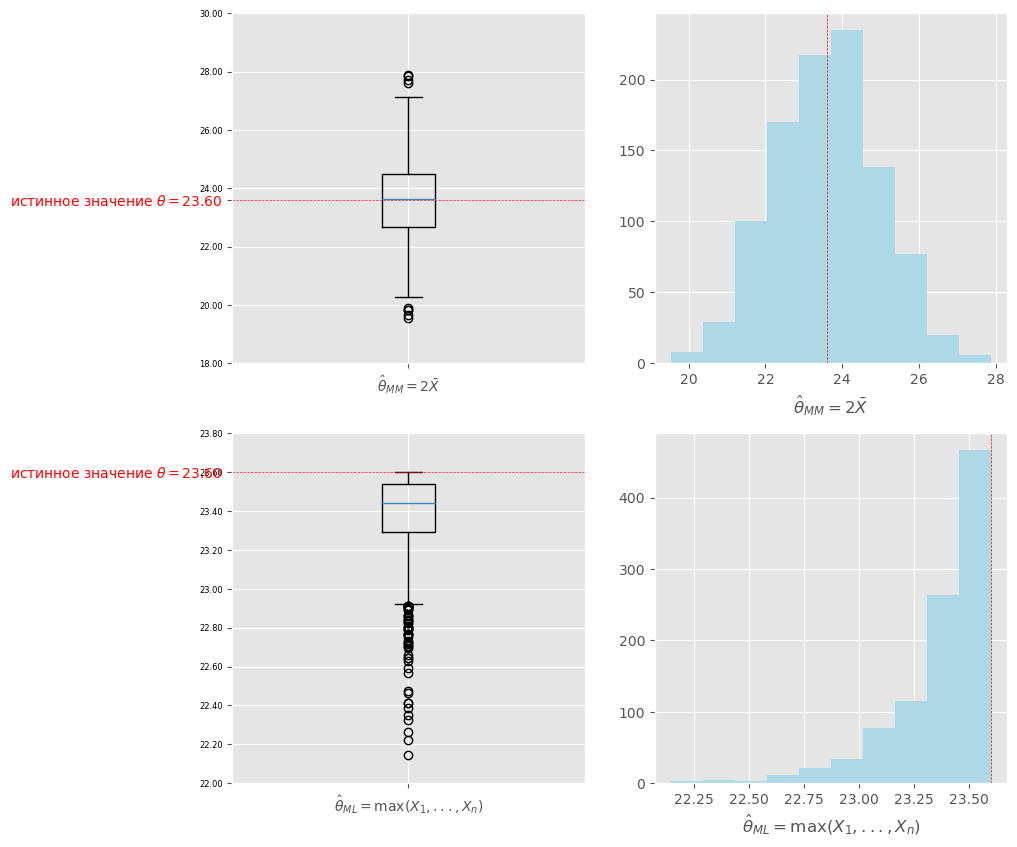

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plot_data(data['mm'], [r'$\hat{\theta}_{MM}=2\bar{X}$'], axs, col=0, row=0)
plot_data(data['ml'], [r'$\hat{\theta}_{ML}=\max{(X_1, ..., X_n)}$'], axs, col=0, row=1)
plt.show()

In [6]:
theta_hat_mm_mse = ((theta_true - np.array(data['mm']))**2).mean()
theta_hat_ml_mse = ((theta_true - np.array(data['ml']))**2).mean()
print(f'Среднеквадратическая ошибка (метод моментов): {theta_hat_mm_mse:0.4f}')
print(f'Среднеквадратическая ошибка (метод ML): {theta_hat_ml_mse:0.4f}')

Среднеквадратическая ошибка (метод моментов): 1.8866
Среднеквадратическая ошибка (метод ML): 0.1037


## Построение Д.И. и их сравнение

### т4 мм ди

Постройте асимптотический (с помощью ЦПТ) доверительный интервал для неизвестного параметра $\theta$  уровня доверия $(1-\alpha)$, используя оценку $\hat{\theta}_\text{ML} = 2\bar{X}$.
$$\hat{\theta}_\text{ML} = 2\bar{X} \ \underset{n\to\infty}{\sim} \
 \mathcal{N}\left(E[2\bar{X}], \ \text{var}(2\bar{X})\right)$$
- Какие будут мат. ожидания и дисперсия у распределения этой оценки? Подставьте результаты из предыдущих заданий.
- Далее удобно стандартизовать используемую оценку и найти её квантили
$$
\\ \ \\
\frac{2\bar{X}-E[2\bar{X}]}{\sqrt{\text{var}(2\bar{X}})} \ \underset{n\to\infty}{\sim} \ \mathcal{N}(0, \ 1)
$$

- Найдите квантили, выразив параметр $\theta$ в неравенстве
$$P\left( \left|\frac{2\bar{X}-E[2\bar{X}]}{\sqrt{\text{var}(2\bar{X}})} \right| \leq z_{1-\alpha/2} \right) = 1-\alpha$$
    - Примечание: здесь в знаменателе можно как подставить оценку дисперсии по выборке, так и подставить выражение, которое зависит от параметра $\theta$


---



<font color=blue>
Пусть $\hat{\theta}_\text{MM} = 2\bar{X}$, тогда (как получено ранее) $E[\hat{\theta}_\text{MM}]=\theta$ и $D[\hat{\theta}_\text{MM}]=\frac{\theta^2}{3n}$, т.е.  
$$ 2\bar{X} \ \underset{n\to\infty}{\sim} \ \mathcal{N}\left(\theta, \ \frac{\theta^2}{3n}\right) $$ 
или в стандартизованном виде 
$$ \sqrt{3n}\left(\frac{\hat{\theta}_\text{MM} - \theta}{\theta}\right) \underset{n\to\infty}{\sim} \mathcal{N}(0,1)$$
Поэтому, если $z_{1-\alpha/2}$ квантиль стандартного нормального распределения, то для асимптотического д.и. получаем:
$$ \mathbb{P}\left(\left\vert\frac{\hat{\theta}_\text{MM}}{\theta}-1\right\vert \leq \frac{z_{1-\alpha/2}}{\sqrt{3n}}\right) = 1 -\alpha $$
$$ \Updownarrow $$
$$ \mathbb{P}\left(\frac{\sqrt{3n}-z_{1-\alpha/2}}{\sqrt{3n}} \leq \frac{\hat{\theta}_\text{MM}}{\theta} \leq \frac{\sqrt{3n} + z_{1-\alpha/2}}{\sqrt{3n}}\right) = 1 -\alpha $$

Тут возможно два случая: 1) если $\hat{\theta}_\text{MM}=0$, тогда асимптотический д.и. для $\theta$ невозможно построить; 2) если $\hat{\theta}_\text{MM} > 0$, тогда получаем:
$$ \mathbb{P}\left(\frac{\sqrt{3n}}{\sqrt{3n}-z_{1-\alpha/2}} \geq \frac{\theta}{\hat{\theta}_\text{MM}} \geq \frac{\sqrt{3n}}{\sqrt{3n} + z_{1-\alpha/2}}\right) = 1 -\alpha $$
$$ \Updownarrow $$
$$ \mathbb{P}\left(\hat{\theta}_\text{MM}\frac{\sqrt{3n}}{\sqrt{3n}-z_{1-\alpha/2}} \geq \theta \geq \hat{\theta}_\text{MM}\frac{\sqrt{3n}}{\sqrt{3n} + z_{1-\alpha/2}}\right) = 1 -\alpha $$
Т.е. асимптотический интервал уровня доверия $1 - \alpha$ для оценки $\hat{\theta}_\text{MM}=2\bar{X}$ параметра $\theta$ будет $\left[\hat{\theta}_\text{MM}\frac{\sqrt{3n}}{\sqrt{3n} + z_{1-\alpha/2}}, \hat{\theta}_\text{MM}\frac{\sqrt{3n}}{\sqrt{3n}-z_{1-\alpha/2}}\right]$    
</font>

<font color=blue>
Ниже эксперимент с построением полученного ассимптотического интервала на python
</font>

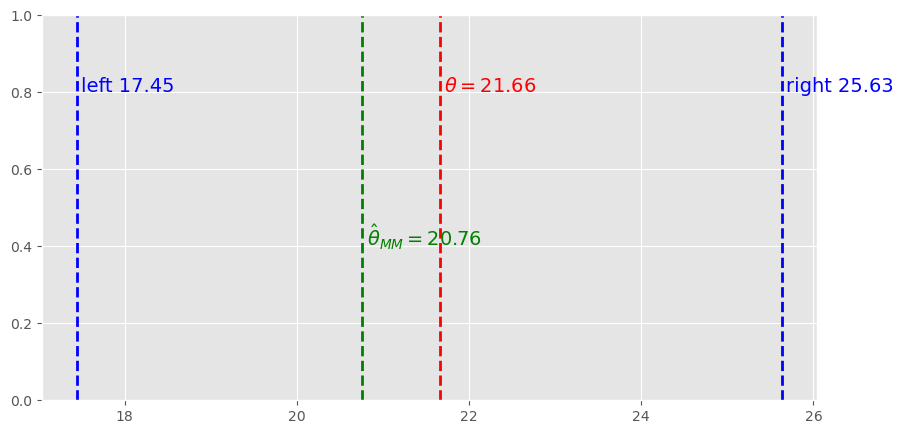

In [7]:
alpha = 0.001 # уровень значимости, т.е. 1-alpha уровень доверия
n = 100 # размер выборки
z_a = stats.norm().ppf(1-alpha/2) # квартиль стандартного нормального распределения уровня 1-alpha/2
theta_true = stats.uniform(10, 20).rvs() # истинное значение theta
samples = stats.uniform(0, theta_true).rvs(size=n) # случайная выборка размера n из распределения U(0, theta)
theta_hat = 2 * samples.mean() # оценка параметра theta (метод моментов)
k = (3 * n) ** 0.5 # промежуточное вычисление - квадратный корень из 3*n
ci_left = theta_hat * (k/(k+z_a)) # левая граница д.и.
ci_right = theta_hat * (k/(k-z_a)) # правая граница д.и.

plt.figure(figsize=(10,5))

y_max = plt.ylim()[1]
text_margin = 0.05

plt.axvline(ci_left, color="blue", linestyle='dashed', lw=2)
plt.text(ci_left + text_margin, 0.8*y_max, f'left {ci_left:.2f}', color="blue", fontsize=14)

plt.axvline(ci_right, color="blue", linestyle='dashed', lw=2)
plt.text(ci_right + text_margin, 0.8*y_max, f'right {ci_right:.2f}', color="blue", fontsize=14)

plt.axvline(theta_true, color="red", linestyle='dashed', lw=2)
plt.text(theta_true + text_margin, 0.8*y_max, f'$\\theta=${theta_true:.2f}', color="red", fontsize=14)

plt.axvline(theta_hat, color="green", linestyle='dashed', lw=2)
plt.text(theta_hat + text_margin, 0.4*y_max, f'$\\hat{{\\theta}}_{{MM}}=${theta_hat:.2f}', color="green", fontsize=14)


plt.show()

### т5 ммп ди (бонусное)
Постройте точный доверительный интервал для параметра $\theta$ уровня доверия $(1-\alpha)$ с помощью оценки $\hat{\theta} = \max(X_1, ..., X_n)$.

- Для этого необходимо найти квантили с помощью функции распределения $\text{cdf}(\hat{\theta}_\text{ML})$.
- Нахождения квантиля подразумевает решение уравнения вида $ P(X\leq q) = \gamma$
- Найденное $q$ из этого уравнения будет квантилем уровня $\gamma$



<font color=blue>
Как было установленно ранее функция распределения случ. величины $\hat{\theta}_\text{ML}$ (далее для краткости $\hat{\theta}$) будет:
$$ F_{\hat{\theta}}(x) = \begin{cases} 0, & x < 0 \\ \left(\frac{x}{\theta}\right)^n, & 0 \le x \le \theta \\ 1, & x > \theta. \end{cases} $$
а плотность:
$$ f_{\hat{\theta}}(x) = \frac{n\cdot x^{n-1}}{\theta^n}\cdot\mathbb{1}\{0 \le x \le \theta\}$$
Пускай $x_{\alpha,l}$ и $x_{\alpha,r}$ таковы, что:
$$ \mathbb{P}(x_{\alpha,l} \leq \hat{\theta} \leq x_{\alpha,r}) = 1 - \alpha $$
Пусть $x_{\alpha,l} = \gamma_l\theta$ и $x_{\alpha,r} = \gamma_r\theta$ ($\theta > 0$, поэтому такие $\gamma$ существуют), тогда
$$\mathbb{P}({\gamma_l\theta \leq \hat{\theta} \leq \gamma_r\theta}) = 1 - \alpha$$
Тогда снова имеем два варианта 1) $\hat{\theta}=0$ - в этом случае точный д.и. нельзя построить и 2) $\hat{\theta} > 0$ - в этом случае получаем:
$$ \mathbb{P}\left(\frac{\hat{\theta}}{\gamma_r} \leq \theta \leq \frac{\hat{\theta}}{\gamma_l}\right) = 1 - \alpha $$
    
Т.е. д. интервалы вида $\left[\frac{\hat{\theta}}{\gamma_r}, \frac{\hat{\theta}}{\gamma_l}\right]$ образуют семейство точных д.и. для параметра $\theta$ уровня доверия $(1-\alpha)$. Построим наиболее узкий из этого семейства.

Видно, что длина д.и. $\Delta = \hat{\theta}\cdot\frac{\gamma_r-\gamma_l}{\gamma_r\gamma_l}=\hat{\theta}\cdot\theta\cdot\frac{x_{\alpha,r}-x_{\alpha,l}}{x_{\alpha,r}x_{\alpha,l}}$ при этом  в силу построения 
$$ \mathbb{P}\left(\frac{\hat{\theta}}{\gamma_r} \leq \theta \leq \frac{\hat{\theta}}{\gamma_l}\right) = \int\limits_{x_{\alpha,l}}^{x_{\alpha,r}} f_{\hat{\theta}}(x)\,dx = 1 - \alpha$$
Т.к. функция плотности монотонна на $[0, \theta]$ и отлична от 0 только на этом отрезке, то во-первых разумно границы интегрирования $x_{\alpha,l}$ и $x_{\alpha,r}$  выбирать внутри отрезка $[0, \theta]$, а во-вторых  при фикисированном уровне $\alpha$ чем ближе эти границы к правому концу отрезка $\theta$ тем меньше величина $x_{\alpha,r} - x_{\alpha,l}$ (длина отрезка интегрирования сужается т.к. подинтегральная функция монотонно растет, а площадь под графиком фиксированна) и больше величина $x_{\alpha,l}\cdot x_{\alpha,r}$, т.е. величина $\Delta(x_{\alpha,l}, x_{\alpha,r})$ достигает минимума.

Поэтому оптимальным правым концом интегрированния будет $x_{\alpha,r} = \theta$, т.е. $\gamma_r = 1$. И для наиболее короткого точного д.и. справедливо:
$$ \mathbb{P}\left(\frac{\hat{\theta}}{\gamma_r} \leq \theta \leq \frac{\hat{\theta}}{\gamma_l}\right) = \mathbb{P}\left(\hat{\theta} \leq \theta \leq \frac{\hat{\theta}}{\gamma_l}\right) = \int\limits_{x_{\alpha,l}}^{\theta} f_{\hat{\theta}}(x)\,dx = F_{\hat{\theta}}(\theta) - F_{\hat{\theta}}(x_{\alpha,l}) = 1 - \left(\frac{x_{\alpha,l}}{\theta}\right)^n =  1 - \alpha $$
$$ \Downarrow $$
$$ \left(\frac{x_{\alpha,l}}{\theta}\right)^n  = \alpha$$
$$ \Downarrow $$
$$ x_{\alpha,l} = \theta \sqrt[n]{\alpha} $$
$$ \Downarrow $$
$$ \gamma_l = \sqrt[n]{\alpha} $$
$$ \Downarrow $$
$$ \mathbb{P}\left(\hat{\theta} \leq \theta \leq \frac{\hat{\theta}}{\sqrt[n]{\alpha}}\right) = 1 - \alpha$$
В итоге самый короткий точный д.и. будет $\left[\hat{\theta}_\text{ML}, \frac{\hat{\theta}_\text{ML}}{\sqrt[n]{\alpha}}\right]$. Стоит отметить, что построенный самый узкий для заданного уровня $\alpha$ доверительный интервал имеет левой границей само значение оценки параметра.

<font color=blue>
Ниже эксперимент с построением полученного точного д. интервала на python
</font>

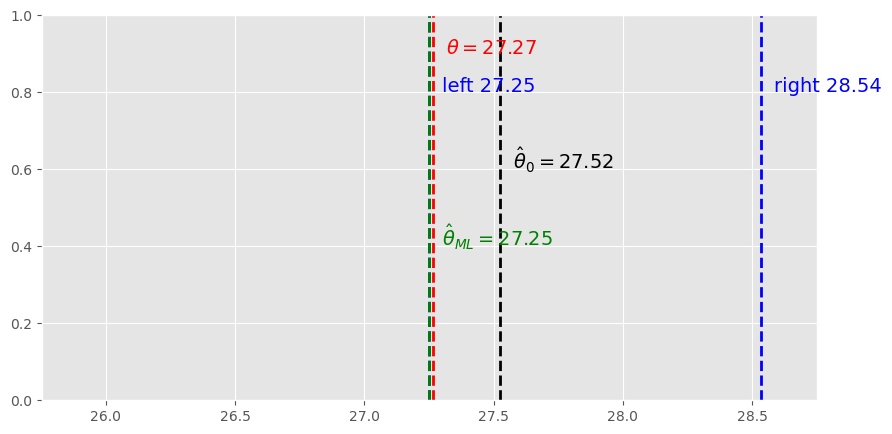

In [8]:
alpha = 0.01 # уровень значимости, т.е. 1-alpha уровень доверия
n = 100 # размер выборки
theta_true = stats.uniform(10, 20).rvs() # истинное значение theta
samples = stats.uniform(0, theta_true).rvs(size=n) # случайная выборка размера n из распределения U(0, theta)
theta_hat = max(samples) # оценка параметра theta (метод максимального правдоподобия)
theta_hat_0 = ((n+1)/n) * theta_hat # несмещенная оценка параметра theta (метод максимального правдоподобия)
k = (alpha) ** (1/n) # промежуточное вычисление - корень n-й степени из alpha
ci_left = theta_hat # левая граница д.и.
ci_right = theta_hat / k # правая граница д.и.

plt.figure(figsize=(10,5))

y_max = plt.ylim()[1]
text_margin = 0.05

plt.axvline(ci_left, color="blue", linestyle='dashed', lw=2)
plt.text(ci_left + text_margin, 0.8*y_max, f'left {ci_left:.2f}', color="blue", fontsize=14)

plt.axvline(ci_right, color="blue", linestyle='dashed', lw=2)
plt.text(ci_right + text_margin, 0.8*y_max, f'right {ci_right:.2f}', color="blue", fontsize=14)

plt.axvline(theta_true, color="red", linestyle='dashed', lw=2)
plt.text(theta_true + text_margin, 0.9*y_max, f'$\\theta=${theta_true:.2f}', color="red", fontsize=14)

plt.axvline(theta_hat, color="green", linestyle='dashed', lw=2)
plt.text(theta_hat + text_margin, 0.4*y_max, f'$\\hat{{\\theta}}_{{ML}}=${theta_hat:.2f}', color="green", fontsize=14)

plt.axvline(theta_hat_0, color="black", linestyle='dashed', lw=2)
plt.text(theta_hat_0 + text_margin, 0.6*y_max, f'$\\hat{{\\theta}}_0=${theta_hat_0:.2f}', color="black", fontsize=14)

plt.show()

### n6 cравнение Д.И.-1
Реализуйте эксперимент в питоне:
- Сгенерируйте выборку размера $n=50$ с псевдонеизвестным параметром  $\theta$ из равномерного распределения на $[10,20]$;
- Посчитайте доверительные интервалы, выведенные ранее, для обеих оценок и сравните их.

---



In [9]:
n = 50
alpha = 0.01
theta_true = stats.uniform(10, 20).rvs()
samples = stats.uniform(0, theta_true).rvs(size=n)

theta_hat_mm = 2 * samples.mean()
k_mm = (3 * n) ** 0.5
z_a = stats.norm().ppf(1 - alpha / 2)
left_mm = theta_hat_mm * ( k_mm / ( k_mm + z_a ))
right_mm = theta_hat_mm * ( k_mm / ( k_mm - z_a ))

theta_hat_ml = max(samples)
k_ml = (alpha) ** (1 / n)
left_ml = theta_hat_ml
right_ml = theta_hat_ml / k_ml

print(f'уровень доверия: {1-alpha}')
print(f'истинное theta: {theta_true:.2f}')
print(f'оценка theta (mm): {theta_hat_mm:.2f}')
print(f'аcимптотический д.и. (mm) {left_mm:.2f}<->{right_mm:.2f} ширина: {right_mm-left_mm:.2f}')
print(f'оценка theta (ml): {theta_hat_ml:.2f}')
print(f'точный д.и. (ml) {left_ml:.2f}<->{right_ml:.2f} ширина: {right_ml-left_ml:.2f}')

уровень доверия: 0.99
истинное theta: 16.77
оценка theta (mm): 17.03
аcимптотический д.и. (mm) 14.07<->21.57 ширина: 7.50
оценка theta (ml): 16.75
точный д.и. (ml) 16.75<->18.36 ширина: 1.62


### n7 cравнение Д.И.-2

n9) Эмпирически проверьте, какой доверительный интервал работает лучше.
- Рассмотрите  
    - Д.И., полученный методом макс. правдоподобия
    - Д.И., полученный методом макс. правдоподобия с коррективкой смещения в оценке параметра
    - Д.И., полученный методом моментов
- Для этого зафиксируйте $\theta$ с псевдонеизвестным параметром значением из равномерного распределения на $[10,20]$.
- Промоделируйте $M = 1000$ раз выборку размера $n = 100$ .
- Затем по каждой выборке вычислите доверительные интервалы и проверьте лежит ли истинный параметр внутри интервала. Далее посчитайте частоту покрытия истинного значения доверительным интервалом. У какого интервала действительно частота равна $1-\alpha$?

<font color=blue>
Найдем Д.И., полученный методом макс. правдоподобия с корректировкой смещения в оценке параметра, т.е. для оценки $\hat{\theta}_0=\frac{n+1}{n}\max{(X_1, ..., X_n)}=\frac{n+1}{n}\hat{\theta}_\text{ML}$ (для двух других оценок Д.И. найдены выше).

Функция распределения $\hat{\theta}_0$ имеет вид:
$$ F_{\hat{\theta}_0}(x) = \mathbb{P}(\hat{\theta}_0 \leq x) = \mathbb{P}\left(\frac{n+1}{n}\hat{\theta}_\text{ML} \leq x\right) = \mathbb{P}\left(\hat{\theta}_\text{ML} \leq \frac{n}{n+1}x\right) = \begin{cases} 0, & x < 0 \\ \left(\frac{n}{n+1}\right)^n\left(\frac{x}{\theta}\right)^n, & 0 \le x \le \frac{n+1}{n}\theta \\ 1, & x > \frac{n+1}{n}\theta. \end{cases} $$

Следовательно плотность распределения $\hat{\theta}_0$ будет
$$ f_{\hat{\theta}_0}(x) = \begin{cases} 0, & \text{otherwise} \\ \left(\frac{n}{n+1}\right)^n\left(\frac{nx^{n-1}}{\theta^n}\right), & 0 \le x \le \frac{n+1}{n}\theta \end{cases}$$
    
Поэтому, повторяя рассуждения, проведенные выше, получаем, что для уровня доверия $(1-\alpha)$ верно:
$$ \mathbb{P}\left(\frac{\hat{\theta}_0}{\gamma_r} \leq \theta \leq \frac{\hat{\theta}_0}{\gamma_l}\right) = \int\limits_{x_{\alpha,l}}^{x_{\alpha,r}} f_{\hat{\theta}_0}(x)\,dx = F_{\hat{\theta}_0}(x_{\alpha,r}) - F_{\hat{\theta}_0}(x_{\alpha,l}) =  1 - \alpha $$
Т.е. оптимальным правым концом интегрированния будет $x_{\alpha,r} = \frac{n+1}{n}\theta$, т.е. $\gamma_r = \frac{n+1}{n}$. И для наиболее короткого точного д.и. справедливо:
$$ \mathbb{P}\left(\frac{\hat{\theta}_0}{\gamma_r} \leq \theta \leq \frac{\hat{\theta}_0}{\gamma_l}\right) = \mathbb{P}\left(\frac{n}{n+1}\hat{\theta}_0 \leq \theta \leq \frac{\hat{\theta}_0}{\gamma_l}\right) = \int\limits_{x_{\alpha,l}}^{\frac{n+1}{n}\theta} f_{\hat{\theta}_0}(x)\,dx = F_{\hat{\theta}}\left(\frac{n+1}{n}\theta\right) - F_{\hat{\theta}}(x_{\alpha,l}) = 1 - \left(\frac{n}{n+1}\right)^n\left(\frac{x_{\alpha,l}}{\theta}\right)^n =  1 - \alpha $$
$$ \Downarrow $$
$$ \left(\frac{n}{n+1}\right)^n\left(\frac{x_{\alpha,l}}{\theta}\right)^n  = \alpha$$
$$ \Downarrow $$
$$ x_{\alpha,l} = \frac{n+1}{n}\cdot\theta\cdot\sqrt[n]{\alpha} $$
$$ \Downarrow $$
$$ \gamma_l = \frac{n+1}{n}\sqrt[n]{\alpha} $$
$$ \Downarrow $$
$$ \mathbb{P}\left(\frac{n}{n+1}\hat{\theta}_0 \leq \theta \leq \frac{n}{n+1}\frac{\hat{\theta}_0}{\sqrt[n]{\alpha}}\right) = 1 - \alpha$$
    
Таким образом самый короткий точный д.и. будет $\left[\frac{n}{n+1}\hat{\theta}_0, \frac{n}{n+1}\frac{\hat{\theta}_0}{\sqrt[n]{\alpha}}\right]$ (который вообще говоря в точности совпадает с ранее найденным интервалом  $\left[\hat{\theta}_\text{ML}, \frac{\hat{\theta}_\text{ML}}{\sqrt[n]{\alpha}}\right]$ для смещенной оценки $\hat{\theta}_\text{ML}$).
</font>

In [10]:
n = 100
M = 1000
alpha = 0.05
z_a = stats.norm().ppf(1-alpha/2)
theta_true = stats.uniform(10, 20).rvs()
c_mm = c_ml = c_ml_0 = 0


for _ in range(M):
    samples = stats.uniform(0, theta_true).rvs(size=n)
    
    theta_hat_mm = 2 * samples.mean()
    k_mm = (3 * n) ** 0.5
    left_mm = theta_hat_mm * (k_mm / (k_mm + z_a))
    right_mm = theta_hat_mm * (k_mm / (k_mm - z_a))
    
    theta_hat_ml = max(samples)
    k_ml = (alpha) ** (1 / n)
    left_ml = theta_hat_ml
    right_ml = theta_hat_ml / k_ml
    
    theta_hat_ml_0 = ((n + 1) / n) * theta_hat_ml
    left_ml_0 = left_ml
    right_ml_0 = right_ml
    
    
    if theta_true <= right_mm and theta_true >= left_mm:
        c_mm += 1
    
    if theta_true <= right_ml and theta_true >= left_ml:
        c_ml += 1
        c_ml_0 += 1

f_mm = c_mm/M
f_ml = c_ml/M

print(f'уровень доверия: {1-alpha}')
print(f'частота попадания в асимптотический д.и. (mm): {f_mm:.4f}; отклонение от уровня доверия: {abs(f_mm-1 + alpha):.4f}')
print(f'частота попадания в точный д.и. (ml - смещенная и несмещенная оценка): {f_ml:.4f}; отклонение от уровня доверия: {abs(f_ml-1 + alpha):.4f}')

уровень доверия: 0.95
частота попадания в асимптотический д.и. (mm): 0.9670; отклонение от уровня доверия: 0.0170
частота попадания в точный д.и. (ml - смещенная и несмещенная оценка): 0.9370; отклонение от уровня доверия: 0.0130


<font color=blue>
Для обоих интервалов наблюдаемая частота немного отличается от уровня доверия.
Вывод для какого интервала частота ближе к уровню доверия сделать нельзя. При разных запусках кода ячейки частота попадания ближе к заданному уровню доверия может быть как для асимптотического д.и. метода моментов, так и для точного д.и. метода ML. Одназначно можно заключить, что точный д.и. ML короче.
    
</font>

# Асимптотические Д.И. (шахты)

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии
* насколько большой у среднего числа аварий доверительный интервал

In [11]:
df = pd.read_csv("coals.csv", index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий.

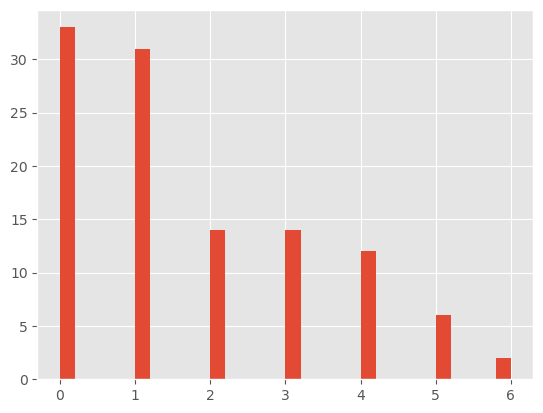

In [12]:
df['count'].hist(bins=30);

In [13]:
df['count'].mean()

1.7053571428571428

In [14]:
df['count'].std()

1.6474845300351904

## Точечная оценка и асимптотический Д.И.

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$.

__Точечная оценка__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

__Стандартное отклонение__

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`.

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт.

__Доверительный интервал__

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [15]:
# число наблюдений
n_hat = len(df)
# ваша оценка метода моментов для лямбды
lam_hat = df['count'].mean()

# ваша оценка для ст. отклонения
lam_se = lam_hat ** 0.5

# уровень значимости
alpha = 0.1

# квантиль норм. распределения
z = stats.norm().ppf(1-alpha/2)

# левая граница дов. интервала
left = lam_hat - z * lam_se/(n_hat ** 0.5)

# правая граница дов. интервала
right = lam_hat + z * lam_se/(n_hat ** 0.5)

# ширина дов. интервала
delta = right - left

print(left, right)

# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

1.502389916114217 1.9083243696000687


## Число катастроф

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал.

Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось.

In [16]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

alpha = 0.05
z =  stats.norm().ppf(1 - alpha / 2)

n1_hat = len(x)
lam1_hat = x.mean()


n2_hat = len(y)
lam2_hat = y.mean()


dif = lam1_hat - lam2_hat
std = (lam1_hat / n1_hat + lam2_hat / n2_hat) ** (0.5)

left = dif - z * std
right = dif + z * std
delta = right - left

print(left, right)

# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

1.2835473859716393 2.3100010011251353


# Д.И. для нормальных выборок (КР)

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [17]:
df = pd.read_csv('cr.csv')
print(df.shape)
df.head()

(389, 19)


,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__

* `fraud` - в списывании скольки задач был уличён студент
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

## Распределение результатов контрольной

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку)
- Постройте гистограмму результатов за первую контрольную
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное?

In [18]:
x = df['k1']

In [19]:
x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 389 entries, 0 to 388
Series name: k1
Non-Null Count  Dtype  
--------------  -----  
389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [20]:
x_mean = x.mean()
x_std = x.std(ddof=1)

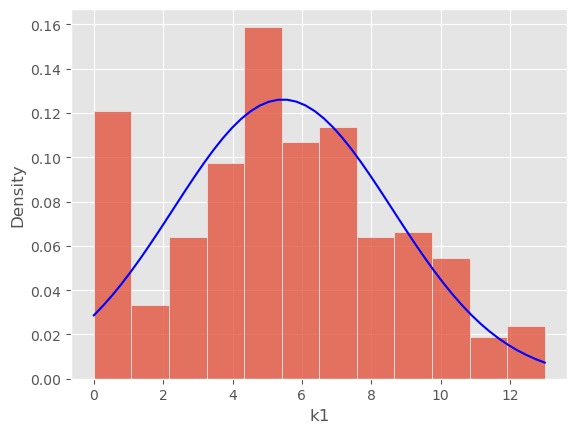

In [21]:
ax = sns.histplot(data=x, stat='density')
xs = np.linspace(0, 13, 50)
ys = stats.norm(loc=x_mean, scale=x_std).pdf(xs)
_ = ax.plot(xs, ys, color='blue')

In [22]:
# проверка, что среднее посчитано корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

<font color=blue>В целом "на глаз" сходство с нормальным распределением имеется, если не брать во внимание заметное отклонение в 0, т.е. кол-во итоговых оценок 0 аномальное велико (если предположить нормальность распределения этой оценки). Это можно устранить, если исключить из датасета записи, у которых все задачи первой контрольной имеют значение `NaN`, но тогда изменится значение `x_mean` и не будет выполнен `assert` из ячейки выше. Ниже построена гистограмма после описанной фильтрации.
</font>

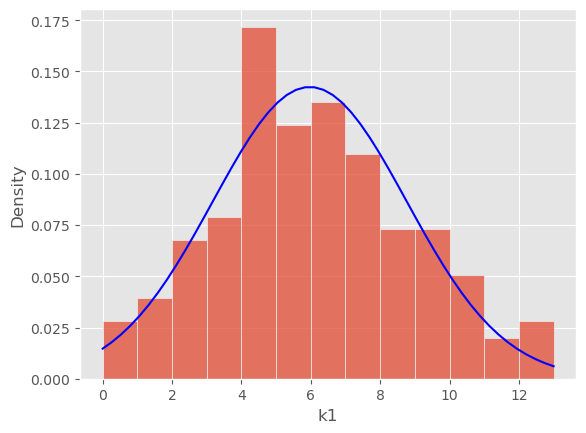

In [23]:
df_filtered = df[~(df['k1a'].isna() & df['k1b'].isna() & df['k1c'].isna() & df['k1d'].isna() & df['k1e'].isna() & df['k1f'].isna())]
df_filtered.reset_index(drop=True, inplace=True)
x_f = df_filtered['k1']
x_mean_f = x_f.mean()
x_std_f = x_f.std(ddof=1)
ax = sns.histplot(data=x_f, stat='density')
xs = np.linspace(0, 13, 50)
ys = stats.norm(loc=x_mean_f, scale=x_std_f).pdf(xs)
_ = ax.plot(xs, ys, color='blue')

<font color=blue>
После фильтрации аномалия в нуле устранилась, но остался не ожидаемый для нормального распределения пик в райне оценки 4. Либо распределение исходно не является нормальным, либо в значениях оценки участвует  какой-то фактор, который сходу не ясен.
</font>

Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

## Д.И. для среднего

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину.

In [24]:
x.size

389

In [25]:
alpha = 0.05
t = stats.t(x.size-1).ppf(1 - alpha / 2) # квантиль распределения Стьюдента (для точного д.и.)

margin = t * x_std / (x.size ** 0.5) # отступ от среднего
left =  x_mean - margin     # левая граница интервала
right = x_mean + margin     # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

5.132472137442806 5.763157682608607


In [26]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

## Хорошие и плохие студенты

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Хорошие и Плохие. У Хороший `fraud == 0`, у Плохих `fraud > 0`.

Запишите оценки за первую контрольную для хороших в переменную `good`, для плохих в `bad`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у хороших и плохих.

__Интервал для разницы средних__

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у хороших и плохих студентнов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже.

Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает?

> *Ответ напишите сюда*

<font color=blue>
Как показывают вычисления ниже ноль входит в получившийся интервал. Это значит, что с вероятностью 0.95 ожидаемая оценка для "хорошего" студента не отличается от ожидаемой оценки для "плохого". Можно сделать вывод, что ожидаемая оценка за контрольную с вероятностью 95% не зависит от того был уличен студент в списывании или нет.
</font>

In [27]:
angels = good = df[df['fraud'] == 0]['k1'].reset_index(drop=True) # датафрейм с оценками хороших студентов
bad = df[df['fraud'] > 0]['k1'].reset_index(drop=True) # датафрейм с оценками плохих студентов

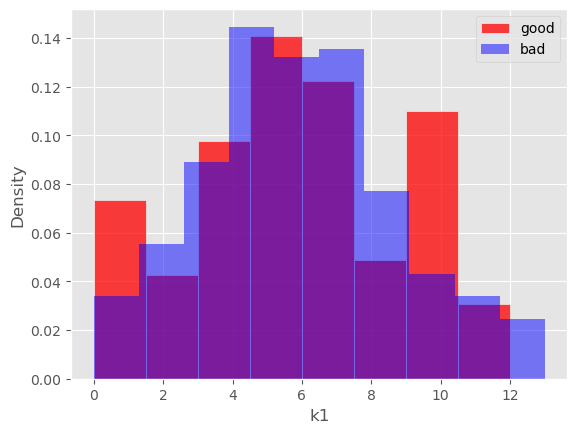

In [28]:
ax = sns.histplot(data=good, stat='density', color='red')
_ = ax.hist(x=bad, density=True, color='blue', alpha=0.5)
_ = ax.legend(labels=['good', 'bad'])

In [29]:
alpha = 0.05 # уровень значимости

n_good = len(good) # число хороших студентов
n_bad = len(bad) # число плохих студентов

mean_good = good.mean() # выборочная средняя оценка хороших студентов
mean_bad = bad.mean() # выборочная средняя оценка плохих студентов

diff = mean_good - mean_bad # разница выборочных средних

var_good = good.std() ** 2 # выборочная дисперсия оценок хороших студентов
var_bad = bad.std() ** 2  # выборочная дисперсия оценок плохих студентов

p = (var_good/n_good+var_bad/n_bad)**2
q = (var_good**2/((n_good**2)*(n_good-1))+var_bad**2/((n_bad**2)*(n_bad-1)))

nu =  p/q # число степеней свободы в распределении Стьюдента
t_a = stats.t(nu).ppf(1 - alpha / 2)

margin =  t_a * (var_good/n_good+var_bad/n_bad)**0.5  # отступ от среднего
left =  diff - margin     # левая граница интервала
right = diff + margin     # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

-0.8045581262764355 0.5469728051755166


In [30]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

## Снова разница средних

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за вторую и первую контрольные. Пропуски в данных заполните нулями.

Входит ли в доверительный интервал ноль? Как думаете, что это означает?

> *Ответ напишите сюда*

<font color=blue>
Расчеты ниже показали, что ноль в доверительный интервал не входит, при этом обе границы интервала $< 0$. Это значит, что для среднего студента ожидаемая оценка за вторую контрольную с вероятностью 0.95 будет меньше, чем за первую.
</font>

In [31]:
df_0 = df.fillna(0)

In [32]:
df_0.head()

,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,1.0,9.0,10.0,20.0,0.0,16.0,12.0,6.7,0.0,5.0,0.0,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,0.0,2.0,10.0,20.0,0.0,20.0,30.0,8.2,20.0,5.0,0.0,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,1.0,10.0,10.0,20.0,0.0,16.0,14.0,7.0,20.0,10.0,0.0,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,0.0,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


In [33]:
alpha = 0.05

diff = df_0['k2'] - df_0['k1']
n  = len(diff)

diff_mean = diff.mean()
diff_std = diff.std()
t_a = stats.t(n-1).ppf(1 - alpha / 2)
margin =  t_a * diff_std / n ** 0.5

left =  diff_mean - margin     # левая граница интервала
right = diff_mean + margin     # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

-1.4562881732820108 -0.7072079706768584


In [34]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

## Д.И. для дисперсии

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности плохих и хороших студентов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант.

Вошла ли в доверительный интервал единица? Как думаете, что это означает?

> *Ответ напишите сюда*

<font color=blue>
Как показали расчеты ниже единица вошла в доверительный интервал. Это значит, что с уверенностью 95% можно утверждать, что нервозность плохих и хороших студентов одинаковая.
</font>

In [35]:
alpha = 0.05
var_ratio = var_bad/var_good
left =  var_ratio * stats.f(n_bad-1, n_good-1).ppf(alpha/2)    # левая граница интервала
right = var_ratio * stats.f(n_bad-1, n_good-1).ppf(1-alpha/2)    # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

0.6247510406208132 1.1865188315990798


In [36]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6247510406208133) < 1e-5

## Доля написавших третью контрольную

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей хороших и плохих студентов, которые решили писать третью контрольную.

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\bar{x} \cdot (1 - \bar{x})}$.
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$.

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым.

Входит ли в доверительный интервал ноль? Как думаете, что это означает?

> *Ответ напишите сюда*

<font color=blue>
Как показали расчеты ниже 0 вошел в доверительный интервал. Это значит, что с уверенностью 95% можно утверждать, что доля студентов, решивших писать 3ю контрольную не зависила от того были это "плохие" студенты или "хорошие".
</font>

In [37]:
alpha = 0.05
p_good = len(df[(df['fraud'] == 0) & (df['k3'] > 0)]) / n_good
p_bad =  len(df[(df['fraud'] > 0) & (df['k3'] > 0)]) / n_bad
diff = p_good - p_bad
z_a = stats.norm().ppf(1-alpha/2)
margin = z_a * (p_good*(1-p_good)/n_good + p_bad*(1-p_bad)/n_bad) ** 0.5
left =  diff - margin     # левая граница интервала
right = diff + margin     # правая граница интервала
delta = right - left     # ширина интервала

print(left, right)

-0.1884946955049297 0.03341212669759032


In [38]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

---

Это домашка подошла к концу!

Поздравляю!

Теперь вы умеете  
- находить оценки методом моментов и проверять их свойства
- строить асимптотические доверительные интервалы для любых выборок
- строить точные доверительные интервалы для нормальных выборок
